In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt, ticker as tick
job_search = pd.read_csv('./job_search_2020-2021.csv')

In [2]:
job_search.head()

,Company,Job Title,Unnamed: 2,Location,First Stage,Second Stage,Third Stage,Fourth Stage,References Handed,Date Applied,Notes,Updated At,Status
0,Trade Coffee,Analytics Engineer,NaN,Remote,NaN,NaN,NaN,NaN,NaN,4/9/2021,NaN,NaN,NaN
1,Rakem,Data Analyst,NaN,Remote,Phone Screen,NaN,NaN,NaN,NaN,4/9/2021,NaN,NaN,NaN
2,Cielo Talent,Reporting Specialist,NaN,Remote,Phone Screen,NaN,NaN,NaN,NaN,4/7/2021,NaN,NaN,NaN
3,Crevoso,Business Intelligence Analyst,NaN,Remote,Phone Screen,NaN,NaN,NaN,NaN,4/6/2021,NaN,NaN,NaN
4,Carvana,"Analyst, Inspection Strategy",NaN,Dallas,Phone Screen,NaN,NaN,NaN,NaN,3/31/2021,NaN,4/9/2021,NaN


## Data Clean

In [3]:
# drop Notes, Updated At, Status. Not useful for analysis in state its in.

job_search.drop(['Unnamed: 2', 'Notes', 'Updated At', 'Status'], axis = 1, inplace=True)
stages = ['First Stage', 'Second Stage', 'Third Stage', 'Fourth Stage', 'References Handed']

In [4]:
import numpy as np
# fill text cells with 1 in stages col
for stage in stages:
    job_search[stage].where(job_search[stage].isnull(), 1, inplace=True)
# fill NaN with 0 in stages cols
job_search[stages] = job_search[stages].fillna(0)
job_search['Date Applied'] = pd.to_datetime(job_search['Date Applied'], infer_datetime_format=True)
clean_search = job_search

In [5]:
clean_search

,Company,Job Title,Location,First Stage,Second Stage,Third Stage,Fourth Stage,References Handed,Date Applied
0,Trade Coffee,Analytics Engineer,Remote,0,0,0,0,0,2021-04-09
1,Rakem,Data Analyst,Remote,1,0,0,0,0,2021-04-09
2,Cielo Talent,Reporting Specialist,Remote,1,0,0,0,0,2021-04-07
3,Crevoso,Business Intelligence Analyst,Remote,1,0,0,0,0,2021-04-06
4,Carvana,"Analyst, Inspection Strategy",Dallas,1,0,0,0,0,2021-03-31
...,...,...,...,...,...,...,...,...,...
348,CircleCI,Data Analyst for Product Growth,Remote,0,0,0,0,0,2020-03-30
349,The Richards Group,Intelligence Data Analyst,Dallas,0,0,0,0,0,2020-03-28
350,Bluecore,Data Insights Analyst,New York City,0,0,0,0,0,2020-03-28
351,Intricately,Business Data Analyst,Remote,0,0,0,0,0,2020-03-23


In [6]:
clean_search["Month_Year Applied"] = clean_search["Date Applied"].dt.to_period('M')

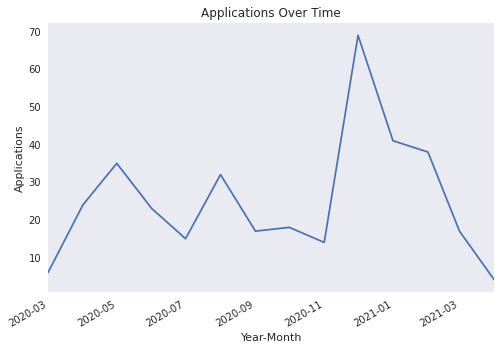

In [7]:
month_year = pd.DataFrame(clean_search["Month_Year Applied"].value_counts())
month_year.rename(columns={"Month_Year Applied" : 'Applications'}, inplace=True)
month_year.index = month_year.index.to_timestamp()
with plt.style.context('seaborn'):
    month_year.plot(grid=False, legend=False)
    plt.title("Applications Over Time")
    plt.xlabel("Year-Month")
    plt.ylabel("Applications")

## Visualization of "Funnel"

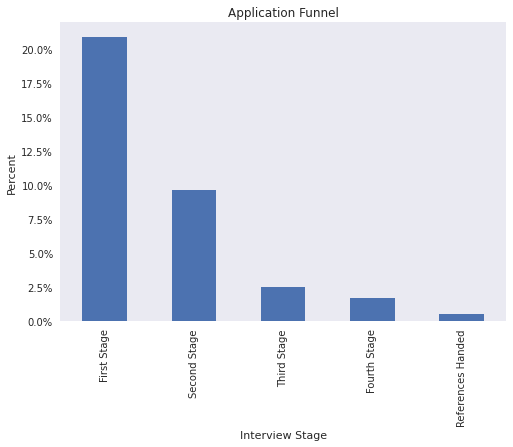

In [8]:
applications = clean_search.shape[0]
stage_count = []
stage_percent = []
for stage in stages:
    count = clean_search[stage].sum()
    percent = round((count / applications) * 100, 2) 
    stage_count.append(count)
    stage_percent.append(percent)

funnel = pd.DataFrame(columns=stages, data=[stage_count, stage_percent]).T
funnel.rename(columns={0: 'Applications', 1: 'Percent'}, inplace=True)
with plt.style.context('seaborn'):
    plt.title("Application Funnel")
    plt.xlabel("Interview Stage")
    plt.ylabel("Percent")
    funnel_plot = funnel['Percent'].plot(kind='bar', grid=False)
    funnel_plot.yaxis.set_major_formatter(tick.PercentFormatter())

## Length of Unemployment

In [9]:
unemployment_date = datetime(year = 2020, month = 3, day = 17)
offer_date = datetime(year = 2021, month = 4, day = 9)
funemployment = offer_date - unemployment_date

funemployment.days

388

## Applications per day

In [10]:
job_search_length = clean_search['Date Applied'].max() - clean_search['Date Applied'].min()
job_search_length = job_search_length.days

apd = job_search_length / applications

apd

1.0821529745042493

## Any Days I didn't apply at all? If so, how many?

In [11]:
first_application_date = job_search['Date Applied'].min()
last_application_date = job_search['Date Applied'].max()
search_duration = pd.date_range(start=unemployment_date, end=last_application_date, closed = 'right').date.tolist()
applied_list = [day.date() for day in set(clean_search["Date Applied"].tolist())]

In [12]:
no_apply = [day for day in search_duration if day not in applied_list]

In [13]:
len(no_apply)

249

## Locations of positions applied to

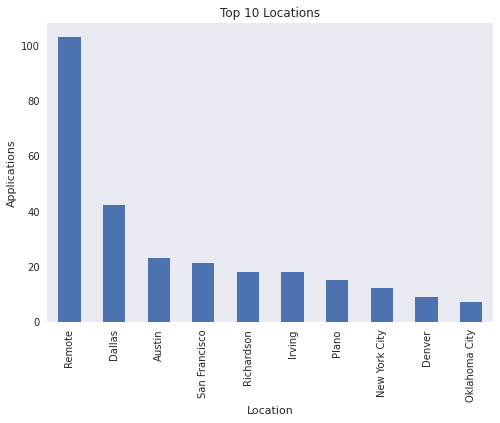

In [14]:
with plt.style.context('seaborn'):
    plt.title("Top 10 Locations")
    plt.xlabel("Location")
    plt.ylabel("Applications")
    clean_search['Location'].value_counts().nlargest(10).plot(kind='bar',
                                                              grid=False)

## Kinds of positions applied to

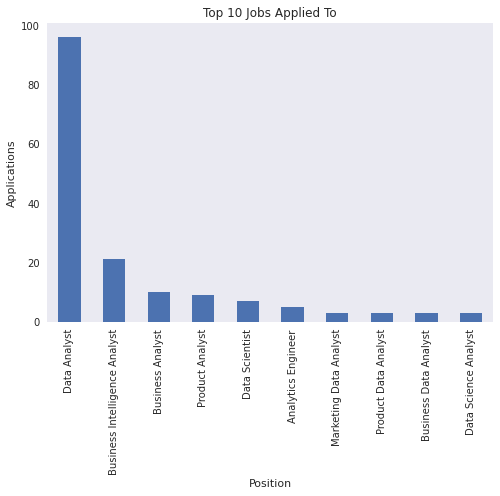

In [15]:
with plt.style.context('seaborn'):
    plt.title("Top 10 Jobs Applied To")
    plt.xlabel("Position")
    plt.ylabel("Applications")
    clean_search['Job Title'].value_counts().nlargest(10).plot(kind='bar',
                                                              grid=False)

## Companies applied to more than once 

In [16]:
clean_search['Company'].value_counts().nlargest(10)

RealPage                     6
Drizly                       3
Mr. Cooper                   3
Doximity                     3
PepsiCo                      3
Uplight                      3
Nerdwallet                   3
Cottonwood Financial         3
Evernote                     2
Boss Flight Entertainment    2
Name: Company, dtype: int64

WANTS:
Channel
Previous Job Search Data
ATS Applied With
Activity Dates

CHALLENGES:
Uniform interview process